In [1]:
import numpy as np
import pandas as pd
import math
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hugo_post_df = pd.read_csv('hugo_posts.csv')
tagged_post_df = pd.read_csv('tagged_posts.csv')

## Get hashtags used by @hugonermanracing

In [3]:
hugo_post_df.head()

,alt,caption,childPosts/0/alt,childPosts/0/caption,childPosts/0/commentsCount,childPosts/0/dimensionsHeight,childPosts/0/dimensionsWidth,childPosts/0/displayUrl,childPosts/0/firstComment,childPosts/0/id,...,ownerUsername,position,productType,queryUsername,shortCode,timestamp,type,url,videoUrl,videoViewCount
0,Me sitting behind the wheel of the Audi TCR Ra...,💥💥ANNOUNCEMENT💥💥\nSo excited to announce that ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,hugonerman,1,NaN,hugonerman,CYisbjrPGzp,2022-01-10T08:01:21.000Z,Image,https://www.instagram.com/p/CYisbjrPGzp/,NaN,NaN
1,Photo by Hugo Nerman | Racing Driver on Decemb...,Merry Christmas!🛷🛷\n\n📸@helge360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,hugonerman,2,NaN,hugonerman,CX4kRpDN-dF,2021-12-24T23:21:59.000Z,Image,https://www.instagram.com/p/CX4kRpDN-dF/,NaN,NaN
2,NaN,Time to jump into the car for the season final...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,hugonerman,3,clips,hugonerman,CUvObMAlkaz,2021-10-07T18:45:29.000Z,Video,https://www.instagram.com/p/CUvObMAlkaz/,https://instagram.ftas1-1.fna.fbcdn.net/v/t50....,14862.0
3,NaN,Race Week!🏁 This time we’re heading to the leg...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,hugonerman,4,clips,hugonerman,CTNmC2FF-tE,2021-08-30T20:44:59.000Z,Video,https://www.instagram.com/p/CTNmC2FF-tE/,https://instagram.ftas1-2.fna.fbcdn.net/v/t50....,4217.0
4,Photo shared by Hugo Nerman | Racing Driver on...,What’s a podium without a challenge?🤺\nStarted...,Photo shared by Hugo Nerman | Racing Driver on...,NaN,0.0,1350.0,1080.0,https://instagram.ftas2-2.fna.fbcdn.net/v/t51....,NaN,2.646745e+18,...,hugonerman,5,NaN,hugonerman,CS7IIQEtInw,2021-08-23T16:36:47.000Z,Sidecar,https://www.instagram.com/p/CS7IIQEtInw/,NaN,NaN


In [4]:
all_hashtags = hugo_post_df.caption.str.findall(r'#.*?(?=\s|$)').tolist()
# all_hashtags

In [5]:
all_hashtags = list(filter(None, all_hashtags))
hashtags_flat_list = []
for sublist in all_hashtags:
    for item in sublist:
        hashtags_flat_list.append(item)
# hashtags_flat_list

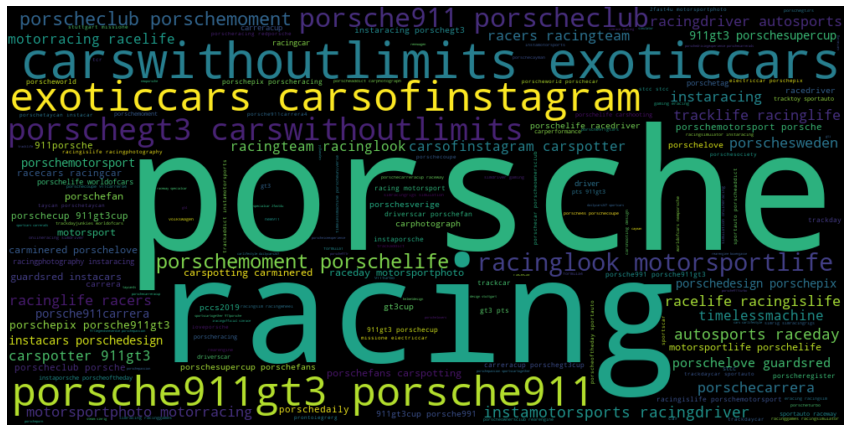

In [6]:
hashtag_string=(" ").join(hashtags_flat_list)
# wordcloud = WordCloud().generate(hashtag_string)
wordcloud = WordCloud(width = 1000, height = 500).generate(hashtag_string)
plt.figure(figsize=(15,8))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
count_hugo_hashtags = Counter(hashtags_flat_list)
count_hugo_hashtags.most_common()

[('#porsche', 66),
 ('#porschelife', 60),
 ('#porschemoment', 51),
 ('#porsche911', 46),
 ('#racing', 42),
 ('#porsche911gt3', 41),
 ('#porscheclub', 40),
 ('#instaracing', 39),
 ('#porschegt3', 39),
 ('#porschelove', 38),
 ('#carsofinstagram', 37),
 ('#911gt3', 37),
 ('#autosports', 36),
 ('#carswithoutlimits', 35),
 ('#exoticcars', 34),
 ('#porschemotorsport', 34),
 ('#instamotorsports', 31),
 ('#porschefans', 30),
 ('#motorracing', 30),
 ('#porschepix', 29),
 ('#racingdriver', 28),
 ('#porschedesign', 28),
 ('#instacars', 27),
 ('#motorsportphoto', 27),
 ('#racinglook', 25),
 ('#motorsportlife', 25),
 ('#racelife', 24),
 ('#racinglife', 24),
 ('#racingislife', 22),
 ('#timelessmachine', 21),
 ('#raceday', 21),
 ('#tracklife', 21),
 ('#porschecup', 20),
 ('#racers', 20),
 ('#racingteam', 20),
 ('#motorsport', 19),
 ('#porschesupercup', 19),
 ('#porschesweden', 19),
 ('#racedriver', 19),
 ('#carspotter', 18),
 ('#991', 18),
 ('#porscheracing', 18),
 ('#sportauto', 18),
 ('#porschecarr

## Get hashtags used in posts tagging @hugonermanracing

In [8]:
tagged_post_df.head()

,postUrl,profileUrl,username,likeCount,commentCount,caption,pubDate,description,location,locationId,...,taggedFullName28,taggedUsername28,taggedFullName29,taggedUsername29,taggedFullName30,taggedUsername30,taggedFullName31,taggedUsername31,taggedFullName32,taggedUsername32
0,https://www.instagram.com/p/CU0MyWeIGVT/,https://www.instagram.com/brinkmotorsport,brinkmotorsport,130,5,NaN,2021-10-09T17:05:36.000Z,Race 3 ✅\n\nDunderkörning av @tobiasbrink sta...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/CUz1pbEoCuI/,https://www.instagram.com/brinkmotorsport,brinkmotorsport,103,0,NaN,2021-10-09T13:43:24.000Z,Race 2 ✅\n\nTufft i starten för @tobiasbrink ...,Ring Knutstorp,1.281506e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/p/CUo2ShQNLGy/,https://www.instagram.com/stcc_official,stcc_official,70,0,NaN,2021-10-05T07:17:22.000Z,Från en race weekend till nästa! 🏁 Ladda upp...,Mantorp Park,2.368596e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/p/CUjgaYIsRkl/,https://www.instagram.com/motorsportmagasinet,motorsportmagasinet,42,0,NaN,2021-10-03T05:30:00.000Z,I helgen är vi på plats på @mantorppark fö...,Mantorp Park,2.368596e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/p/CUKM7uBMnyf/,https://www.instagram.com/motorsportmagasinet,motorsportmagasinet,78,2,NaN,2021-09-23T09:38:46.000Z,Vallåkra 2021 💥 \n\n#vallåkraträffen #valla...,Vallåkra TRÄFFEN,1.021666e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
all_tagged_hashtags_with_nan = tagged_post_df.description.str.findall(r'#.*?(?=\s|$)').tolist()
all_tagged_hashtags = []
for sublist in all_tagged_hashtags_with_nan:
    if type(sublist) is float:
        continue
    else:
        all_tagged_hashtags.append(sublist)


In [10]:
all_tagged_hashtags = list(filter(None, all_tagged_hashtags))

tagged_hashtags_flat_list = []
for sublist in all_tagged_hashtags:
    for item in sublist:
        tagged_hashtags_flat_list.append(item)

# tagged_hashtags_flat_list

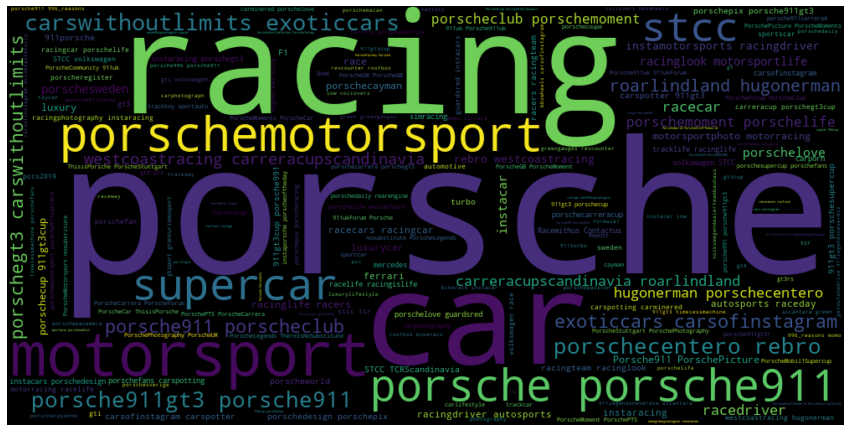

In [11]:
tagged_hashtag_string=(" ").join(tagged_hashtags_flat_list)
# wordcloud2 = WordCloud().generate(hashtag_string)
wordcloud2 = WordCloud(width = 1000, height = 500).generate(tagged_hashtag_string)
plt.figure(figsize=(15,8))

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
count_tagged_hashtags = Counter(tagged_hashtags_flat_list)
count_tagged_hashtags.most_common()

[('#porsche', 94),
 ('#porsche911', 60),
 ('#racing', 53),
 ('#carsofinstagram', 48),
 ('#porschemoment', 42),
 ('#hugonerman', 39),
 ('#porschelife', 38),
 ('#carswithoutlimits', 37),
 ('#porscheclub', 35),
 ('#carreracupscandinavia', 35),
 ('#porsche911gt3', 34),
 ('#porschegt3', 31),
 ('#westcoastracing', 31),
 ('#porschemotorsport', 30),
 ('#stcc', 29),
 ('#cars', 29),
 ('#porschelove', 27),
 ('#volkswagen', 26),
 ('#car', 25),
 ('#instaracing', 25),
 ('#autosports', 25),
 ('#STCC', 24),
 ('#911', 24),
 ('#911gt3', 24),
 ('#exoticcars', 24),
 ('#porschepix', 23),
 ('#instacars', 23),
 ('#porschecup', 23),
 ('#roarlindland', 23),
 ('#race', 22),
 ('#porschefans', 22),
 ('#porschecenterörebro', 22),
 ('#Porsche', 21),
 ('#porscheracing', 20),
 ('#motorracing', 20),
 ('#991', 20),
 ('#motorsport', 19),
 ('#instamotorsports', 19),
 ('#porschesweden', 18),
 ('#racingdriver', 17),
 ('#motorsportphoto', 17),
 ('#carspotting', 16),
 ('#porschecarrera', 16),
 ('#instacar', 16),
 ('#911gt3c